In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
cohere_api_key = os.getenv("COHERE_API_KEY")

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from langchain_cohere.llms import Cohere


# Define functions for tools
def fetch_stock_data(ticker: str) -> pd.DataFrame:
    stock_data = yf.download(ticker, period="6mo")  # 6 months of data
    if stock_data.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    return stock_data

def calculate_moving_averages_tool(data: pd.DataFrame, short_window: int = 10, long_window: int = 50) -> pd.DataFrame:
    if data.empty:
        raise ValueError("Stock data is empty.")
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    return data

def visualize_tool(data: pd.DataFrame, ticker: str) -> str:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="Closing Price", alpha=0.75)
    plt.plot(data.index, data['Short_MA'], label="Short MA (10 days)", linestyle='--')
    plt.plot(data.index, data['Long_MA'], label="Long MA (50 days)", linestyle='--')
    plt.title(f"Stock Price and Moving Averages for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    image_path = f"{ticker}_moving_averages_chart.png"
    plt.show()

In [12]:
ticker = "TSLA"
stock_data = fetch_stock_data(ticker)

[*********************100%***********************]  1 of 1 completed


In [36]:
roll_10 = stock_data['Close'].ewm(span=10, adjust=False).mean().dropna()

In [37]:
roll_10.shape

(128, 1)

In [15]:
mavg = calculate_moving_averages_tool(stock_data)

In [21]:
mavg

Price,Adj Close,Close,High,Low,Open,Volume,Short_MA,Long_MA
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2024-05-22,180.110001,180.110001,183.800003,178.119995,182.850006,88313500,NaN,NaN
2024-05-23,173.740005,173.740005,181.899994,173.259995,181.800003,71975500,NaN,NaN
2024-05-24,179.240005,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN
2024-05-28,176.750000,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN
2024-05-29,176.190002,176.190002,178.149994,173.929993,174.190002,54782600,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-11-15,320.720001,320.720001,324.679993,309.220001,310.570007,114440300,NaN,NaN
2024-11-18,338.739990,338.739990,348.549988,330.010010,340.730011,126547500,NaN,NaN


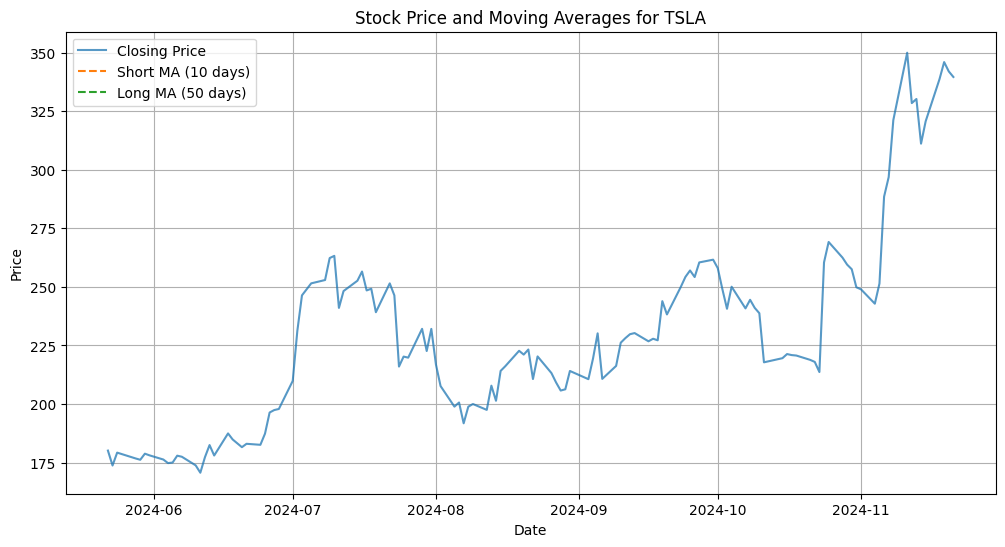

In [20]:
visualize_tool(mavg, ticker)